#Pre-Processing, Data Visualization, EDA  


1.   Exploring the given Data files, classes and images of different classes.
2.   Dealing with missing values
3.   Visualization of different classes
4.   Analysis from the visualization of different classes. 

In [0]:
%tensorflow_version 2.x

In [29]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [0]:
import pandas as pd 
import numpy as np
from seaborn import countplot
from matplotlib.pyplot import figure, show

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Set your project path 
project_path =  'drive/My Drive/Colab Notebooks/Capstone'

In [33]:
import os
arr = os.listdir(project_path+'/dataset')
print(arr)

['GCP Credits Request Link - RSNA.txt', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'stage_2_train_labels.csv', 'stage_2_test_images', 'stage_2_train_images']


The dataset folder contains following,
1. stage_2_detailed_class_info.csv - containing class informations
2. stage_2_train_labels.csv - containing labels for training data
3. stage_2_test_images - Test images
4. stage_2_train_images - Train images

Lets check the informations in the csv files by loading them in a dataframes 

In [0]:
class_info_df = pd.read_csv(project_path+'/dataset/stage_2_detailed_class_info.csv')
train_labels_df = pd.read_csv(project_path+'/dataset/stage_2_train_labels.csv') 

In [0]:
sample_sub_df = pd.read_csv(project_path+'/dataset/stage_2_sample_submission.csv') 

In [36]:
print(f"Class info csv - Rows: {class_info_df.shape[0]} , Columns: {class_info_df.shape[1]}")
print(f"Train labels csv - Rows: {train_labels_df.shape[0]} , Columns: {train_labels_df.shape[1]}")

Class info csv - Rows: 30227 , Columns: 2
Train labels csv - Rows: 30227 , Columns: 6


In [37]:
print(f"Sample submission csv - Rows: {sample_sub_df.shape[0]} , Columns: {sample_sub_df.shape[1]}")

Sample submission csv - Rows: 3000 , Columns: 2


In [38]:
class_info_df.head(5)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


The Class info csv contains, 
Patient Id and the Class he belongs to.

In [39]:
train_labels_df.head(5)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


The train labels csv contains, Patient Id, x coordinate, y coordinate, width and height of the Pneumonia traces in the train images. Target column provides information about the Patient has Pneumonia or not.



In [40]:
sample_sub_df.head(5)

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100


In [41]:
class_info_df.isnull().sum()

patientId    0
class        0
dtype: int64

In [42]:
train_labels_df.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [43]:
class_info_df["class"].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

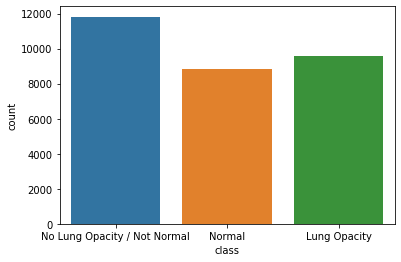

In [44]:
figure()
countplot(data=class_info_df,x="class")
show()

In [45]:
class_info_df["patientId"].value_counts()

1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
3239951b-6211-4290-b237-3d9ad17176db    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
                                       ..
579c68e7-c03e-4cd7-bda5-93de372571f2    1
a4edd09a-b103-4d56-b115-25cbb086ec97    1
ed86aa75-d0aa-4315-a4f1-5333e280f58c    1
d8795f44-d739-42a7-8f94-5dd3cce71869    1
522f915a-c395-4158-b7fb-defa93cac8ea    1
Name: patientId, Length: 26684, dtype: int64

In [46]:
train_labels_df["Target"].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

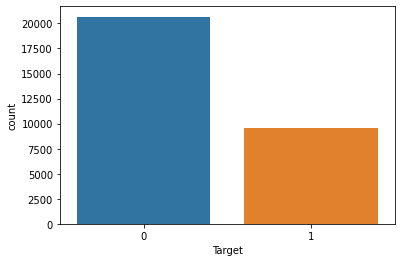

In [47]:
figure()
countplot(data=train_labels_df,x="Target")
show()

In [48]:
train_labels_df["patientId"].value_counts()

1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
3239951b-6211-4290-b237-3d9ad17176db    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
                                       ..
579c68e7-c03e-4cd7-bda5-93de372571f2    1
a4edd09a-b103-4d56-b115-25cbb086ec97    1
ed86aa75-d0aa-4315-a4f1-5333e280f58c    1
d8795f44-d739-42a7-8f94-5dd3cce71869    1
522f915a-c395-4158-b7fb-defa93cac8ea    1
Name: patientId, Length: 26684, dtype: int64

**Merge the 'class_info_df' and 'train_labels_df'**

In [0]:
train_class_df = train_labels_df.merge(class_info_df, left_on='patientId', right_on='patientId', how='inner')

In [50]:
train_class_df.head(5)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [51]:
train_class_df[train_class_df['patientId']=='32408669-c137-4e8d-bd62-fe8345b40e73']

,patientId,x,y,width,height,Target,class
3433,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3434,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3435,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3436,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3437,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3438,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3439,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3440,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
3441,32408669-c137-4e8d-bd62-fe8345b40e73,300.0,367.0,226.0,423.0,1,Lung Opacity
3442,32408669-c137-4e8d-bd62-fe8345b40e73,300.0,367.0,226.0,423.0,1,Lung Opacity


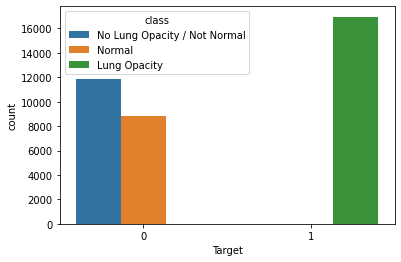

In [52]:
figure()
countplot(data=train_class_df,x="Target", hue="class")
show()

Target = 1 refers to Patients with class 'Lung Opacity'.

Target = 0 refers to Patients with class 'Normal' and 'No Lung Opacity / Not Normal'.

# **Exploring Train & Test Images**

In [53]:
image_train_path = os.listdir(project_path+'/dataset/stage_2_train_images')
image_test_path = os.listdir(project_path+'/dataset/stage_2_test_images')
print("Number of images in train set:", len(image_train_path),"\nNumber of images in test set:", len(image_test_path))

Number of images in train set: 26704 
Number of images in test set: 3000


In [54]:
print("Unique Patient Id from train_class_df: ", train_class_df['patientId'].nunique())

Unique Patient Id from train_class_df:  26684


The number of unique PatientId in the train_class_df is equal to the number of images in the train set. 

In [55]:
#!pip install pydicom

     |████████████████████████████████| 35.3MB 1.4MB/s 


In [0]:
import pydicom as dcm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

In [57]:
samplePatientID = train_class_df["patientId"][0]
samplePatientID = samplePatientID+'.dcm'
dicom_file_path = os.path.join(project_path+"/dataset/stage_2_train_images/",samplePatientID)
dicom_file_dataset = dcm.read_file(dicom_file_path)
dicom_file_dataset

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [0]:
def display_images(data):
    img_data = list(data.T.to_dict().values())
    #img_data = list(data)
    f, ax = plt.subplots(1,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        imageName = data_row['patientId']+'.dcm'
        imagePath = os.path.join(project_path+"/dataset/stage_2_train_images/",imageName)
        data_row_img = dcm.dcmread(imagePath)
        ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i%3].axis('off')
        ax[i%3].set_title('ID: {}\nClass: {}'.format(
                data_row['patientId'], data_row['class']))
    plt.show()

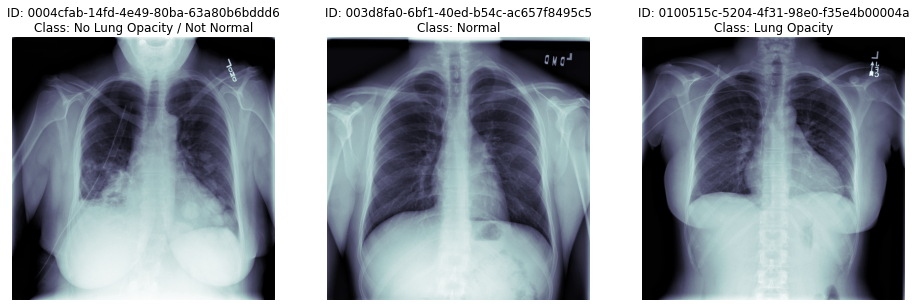

In [122]:
unq3_patient_id = ['0004cfab-14fd-4e49-80ba-63a80b6bddd6','003d8fa0-6bf1-40ed-b54c-ac657f8495c5','0100515c-5204-4f31-98e0-f35e4b00004a']
sample_df = train_class_df[train_class_df.patientId.isin(unq3_patient_id)]
display_images(sample_df)

In [0]:
def display_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(1,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        imageName = data_row['patientId']+'.dcm'
        imagePath = os.path.join(project_path+"/dataset/stage_2_train_images/",imageName)
        data_row_img = dcm.dcmread(imagePath)
        ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i%3].axis('off')
        ax[i%3].set_title('ID: {}\nClass: {}'.format(
                data_row['patientId'], data_row['class']))
        rows = train_class_df[train_class_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        linewidth=1,edgecolor='r',facecolor='none'))   
    plt.show()

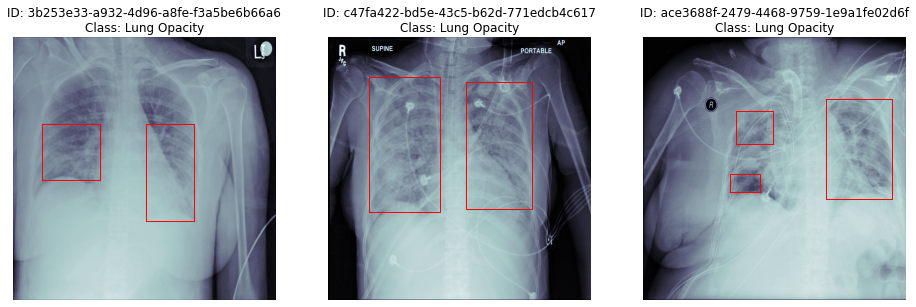

In [132]:
sample_tar_df = train_class_df[train_class_df['Target']==1].sample(3)
display_images_with_boxes(sample_tar_df)